# DDL建表高阶语法

## 1 Hive Database|Schema（数据库）DDL操作

### 1.1 整体概述

在Hive中，DATABASE的概念和RDBMS中类似，我们称之为数据库，DATABASE和SCHEMA是可互换的，都可以使用。

默认的数据库叫做default，存储数据位置位于/user/hive/warehouse下。

用户自己创建的数据库存储位置是/user/hive/warehouse/database_name.db下。

### 1.2 create database

create database用于创建新的数据库

    COMMENT：数据库的注释说明语句
    LOCATION：指定数据库在HDFS存储位置，默认/user/hive/warehouse/dbname.db
    WITH DBPROPERTIES：用于指定一些数据库的属性配置。

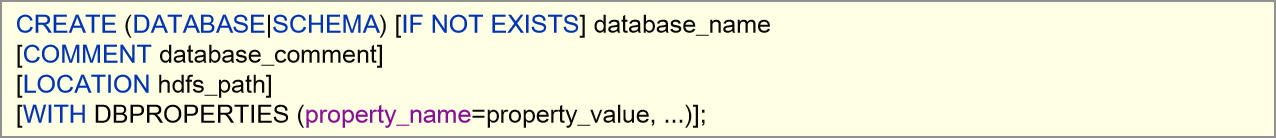

**注意：如果需要使用location指定路径的时候，最好指向的是一个新创建的空文件夹。**

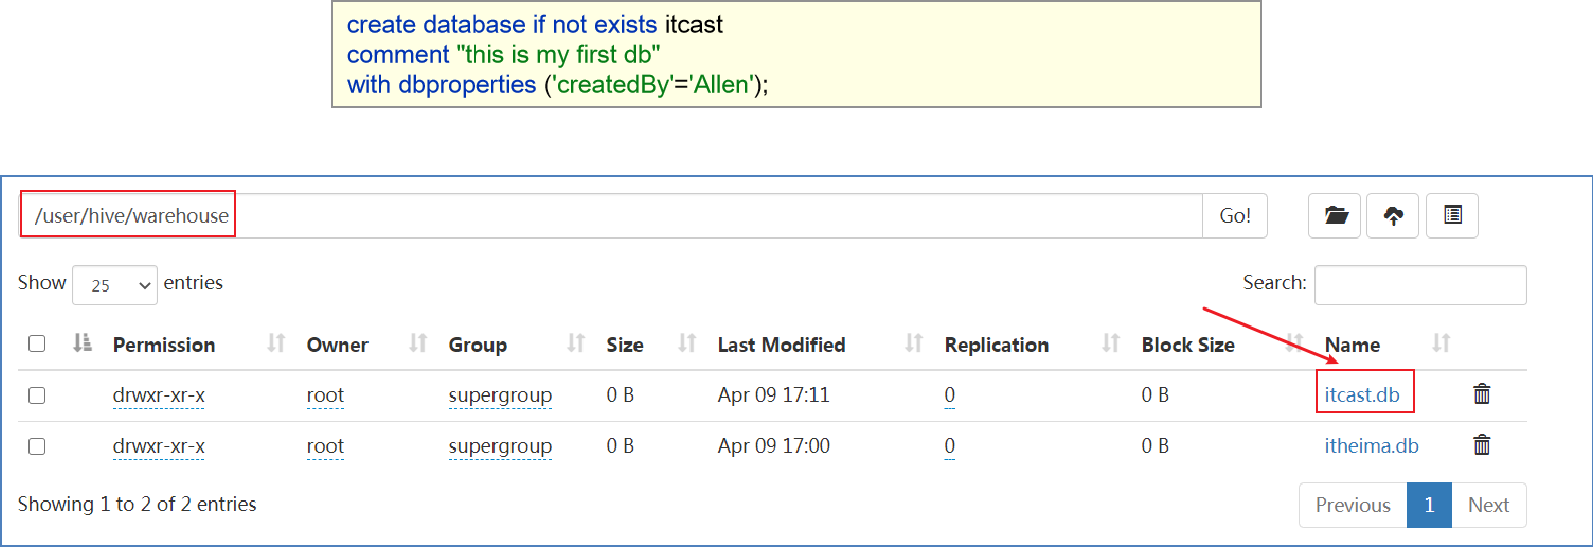

### 1.3 describe database

显示Hive中数据库的名称，注释（如果已设置）及其在文件系统上的位置等信息。

    EXTENDED关键字用于显示更多信息。可以将关键字describe简写成desc使用。

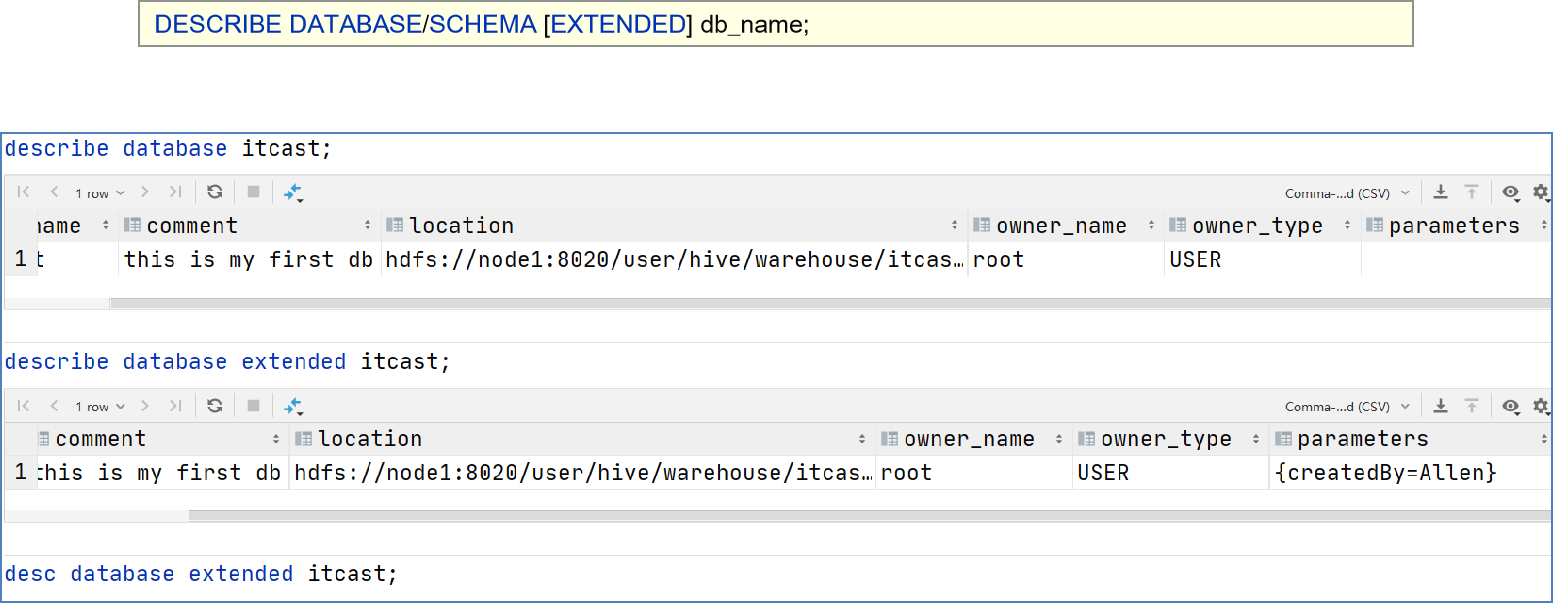

### 1.4 use database

选择特定的数据库

    切换当前会话使用哪一个数据库进行操作

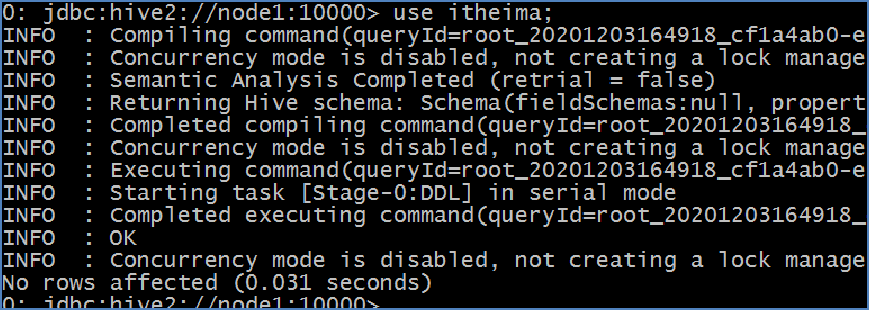

### 1.5 drop database

删除数据库

    默认行为是RESTRICT，这意味着仅在数据库为空时才删除它。
    要删除带有表的数据库（不为空的数据库），我们可以使用CASCADE。

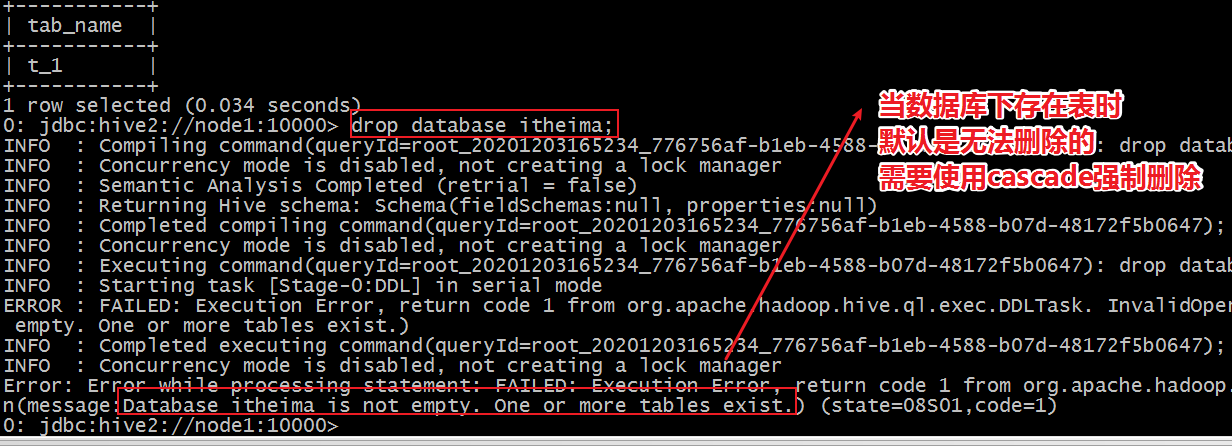

### 1.6 alter database

更改与Hive中的数据库关联的元数据

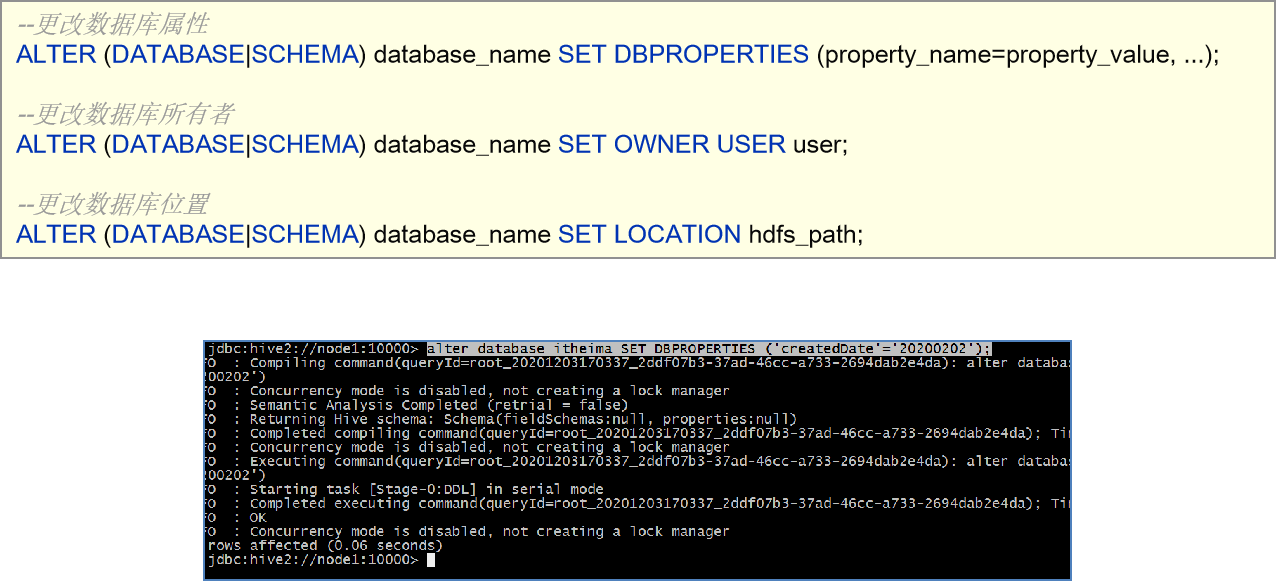

## 2 Hive Table（表）DDL操作

### 2.1 整体概述

Hive中针对表的DDL操作可以说是DDL中的核心操作，包括建表、修改表、删除表、描述表元数据信息。

其中以建表语句为核心中的核心，详见Hive DDL建表语句。

可以说表的定义是否成功直接影响着数据能够成功映射，进而影响是否可以顺利的使用Hive开展数据分析。

由于Hive建表之后加载映射数据很快，实际中如果建表有问题，可以不用修改，直接删除重建。

### 2.2 describe table

显示Hive中表的元数据信息

    如果指定了EXTENDED关键字，则它将以Thrift序列化形式显示表的所有元数据。
    如果指定了FORMATTED关键字，则它将以表格格式显示元数据。

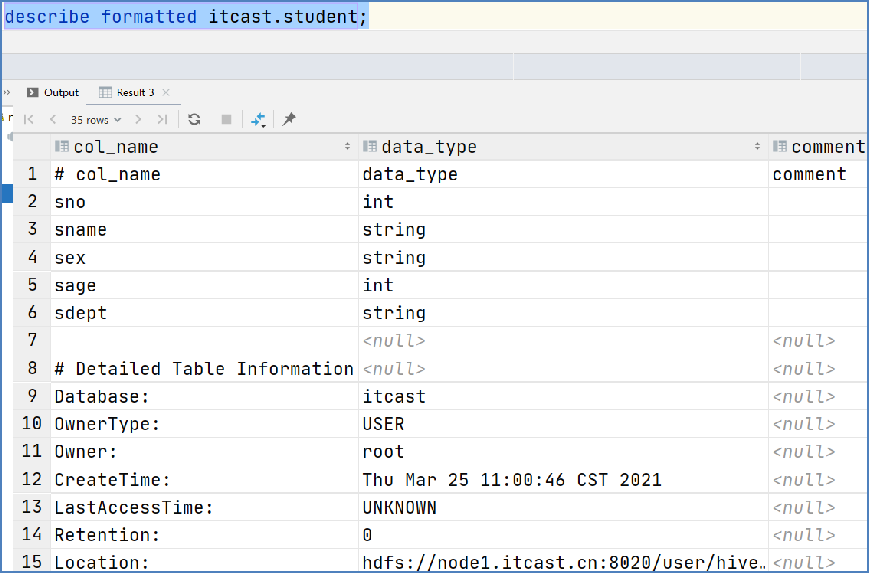

### 2.3 drop table

删除该表的元数据和数据

    如果已配置垃圾桶且未指定PURGE，则该表对应的数据实际上将移动到HDFS垃圾桶，而元数据完全丢失。
    删除EXTERNAL表时，该表中的数据不会从文件系统中删除，只删除元数据。
    如果指定了PURGE，则表数据跳过HDFS垃圾桶直接被删除。因此如果DROP失败，则无法挽回该表数据。

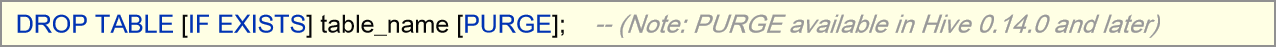

### 2.4 truncate table

从表中删除所有行。

    可以简单理解为清空表的所有数据但是保留表的元数据结构。
    如果HDFS启用了垃圾桶，数据将被丢进垃圾桶，否则将被删除。

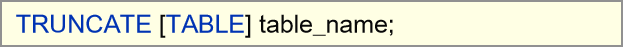

### 2.5 alter table

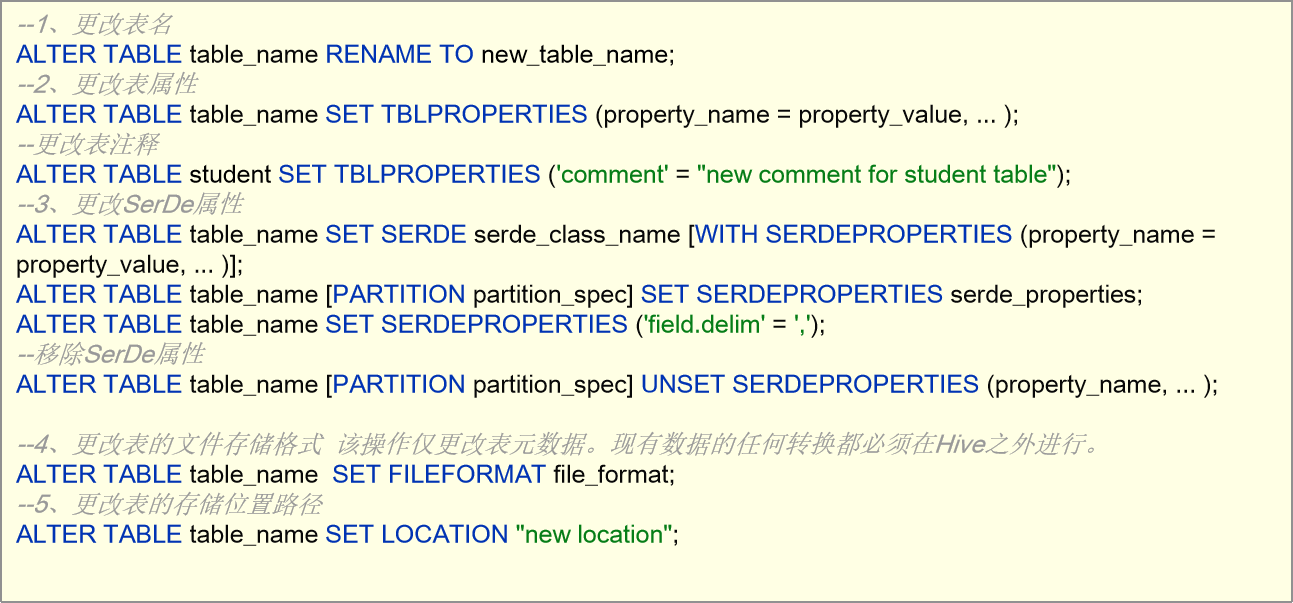

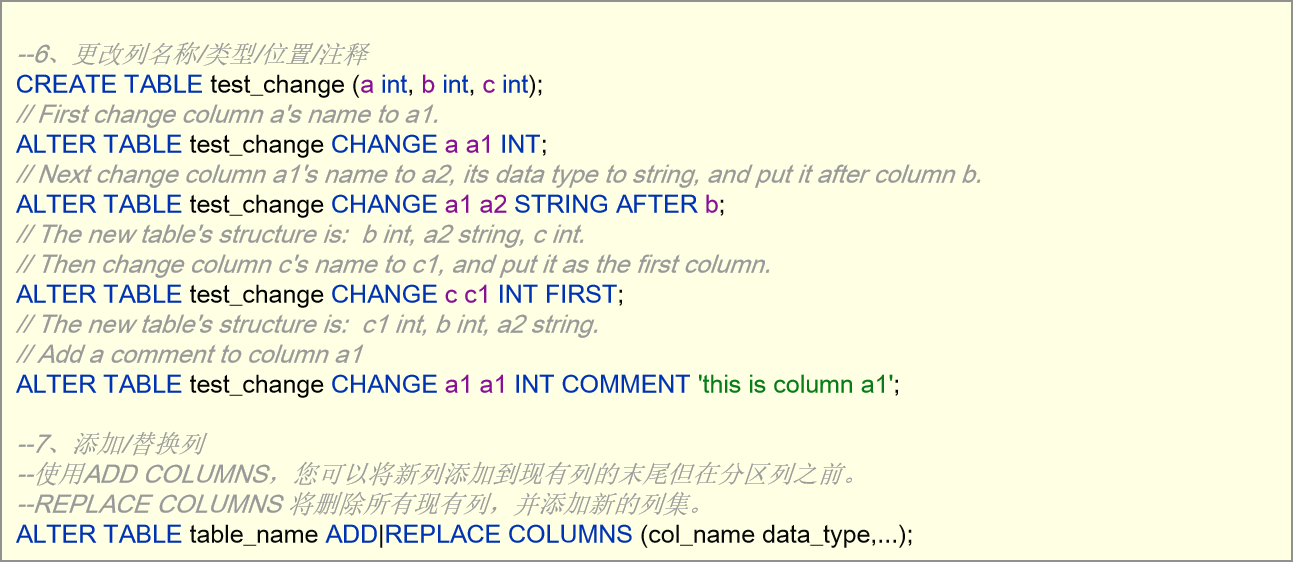

## 3 Hive Partition（分区）DDL操作

### 3.1 add partition

ADD PARTITION会更改表元数据，但不会加载数据。如果分区位置中不存在数据，查询时将不会返回结果。

因此需要保证增加的分区位置路径下，数据已经存在，或者增加完分区之后导入分区数据。

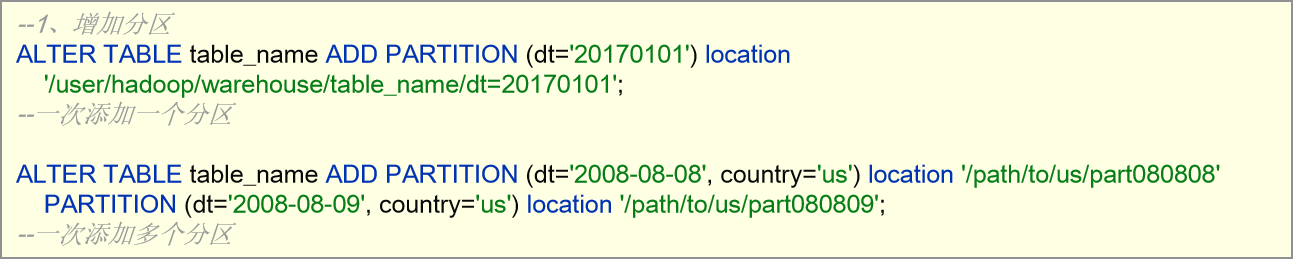

### 3.2 rename partition

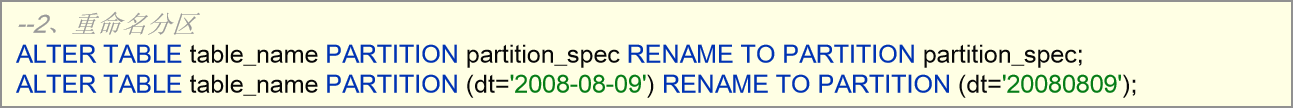

### 3.3 delete partition

删除表的分区。这将删除该分区的数据和元数据。

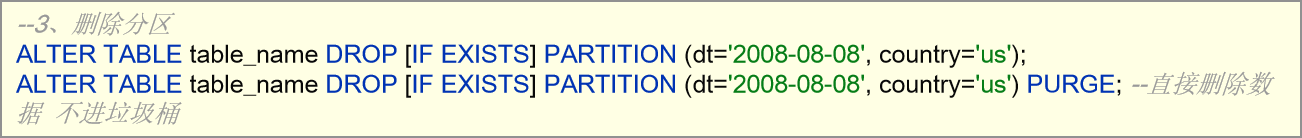

### 3.4 alter partition

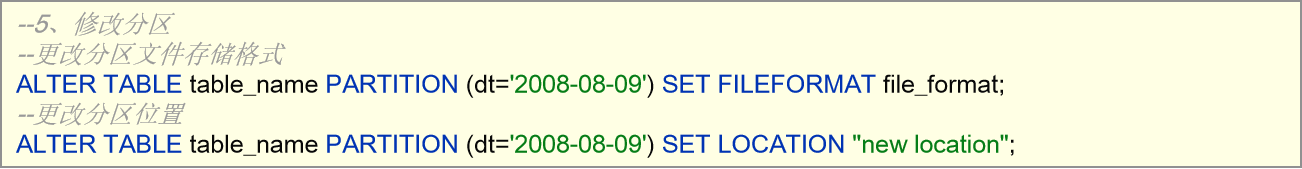

### 3.5 MSCK partition背景

Hive将每个表的分区列表信息存储在其metastore中。但是，如果将新分区直接添加到HDFS（例如通过使用hadoop fs -put命令）或从HDFS中直接删除分区文件夹，则除非用户ALTER TABLE table_name ADD/DROP PARTITION在每个新添加的分区上运行命令，否则metastore（也就是Hive）将不会意识到分区信息的这些更改。

MSCK是metastore check的缩写，表示元数据检查操作，可用于元数据的修复。

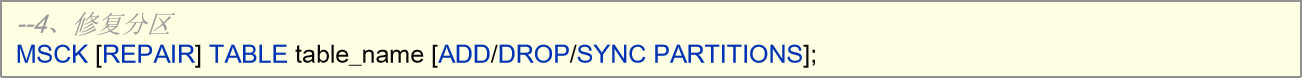

- MSCK默认行为ADD PARTITIONS，使用此选项，它将把HDFS上存在但元存储中不存在的所有分区添加到metastore。
- DROP PARTITIONS选项将从已经从HDFS中删除的metastore中删除分区信息。
- SYNC PARTITIONS选项等效于调用ADD和DROP PARTITIONS。
- 如果存在大量未跟踪的分区，则可以批量运行MSCK REPAIR TABLE，以避免OOME（内存不足错误）。

**案例：Hive MSCK 修复partition**

    创建一张分区表，直接使用HDFS命令在表文件夹下创建分区文件夹并上传数据，此时在Hive中查询是无法显示表数据的，因为metastore中没有记录，使用MSCK ADD PARTITIONS进行修复。
    针对分区表，直接使用HDFS命令删除分区文件夹，此时在Hive中查询显示分区还在，因为metastore中还没有被删除，使用MSCK DROP PARTITIONS进行修复。

**MSCK ADD PARTITIONS** 

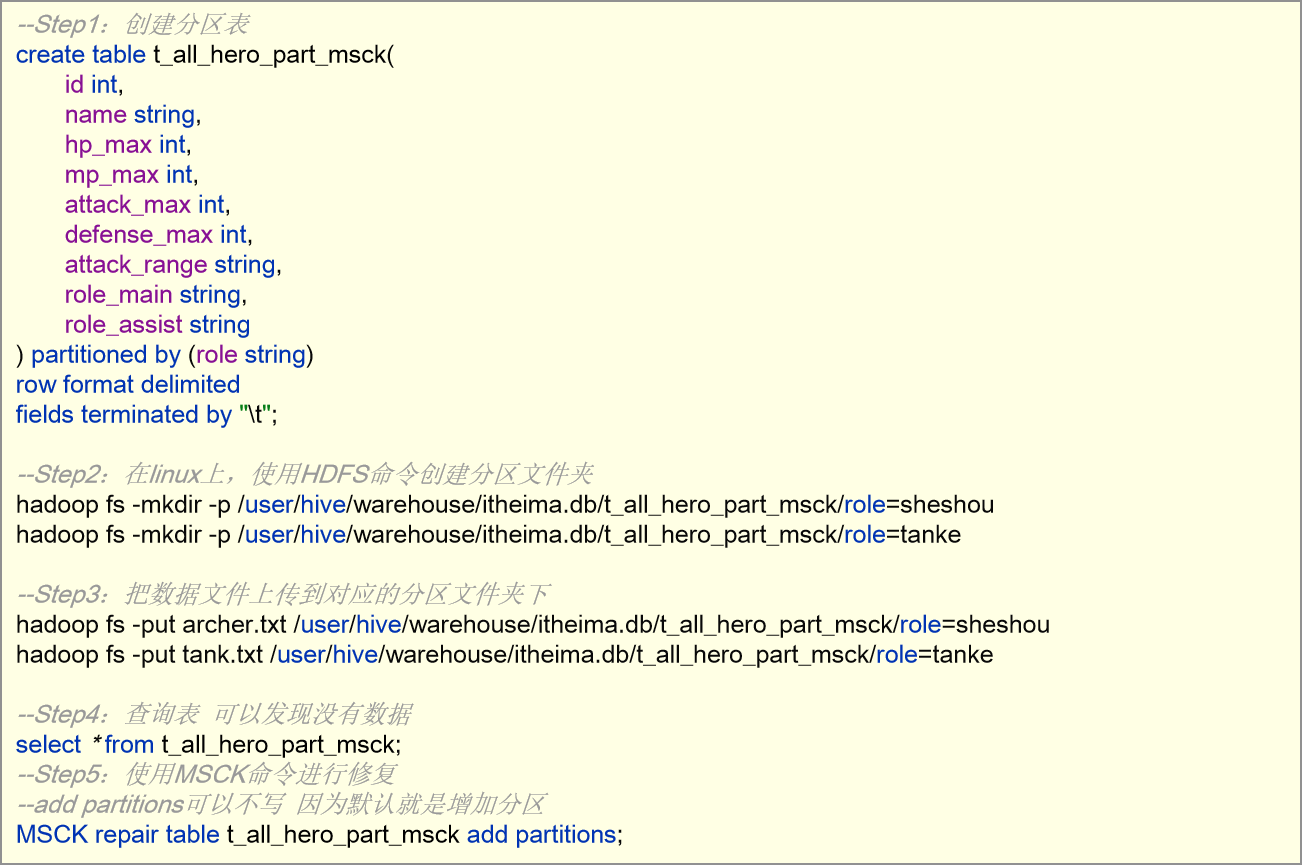

**MSCK DROP PARTITIONS** 

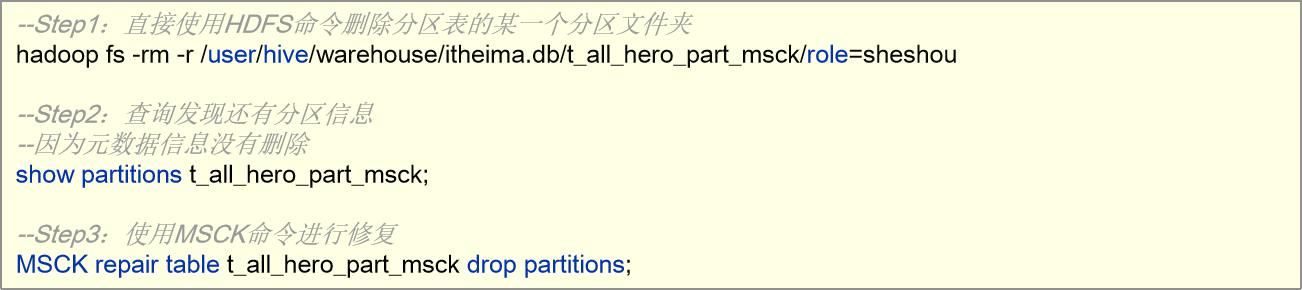

## 4 Hive Show语法

### 4.1 整体概述

Show相关的语句提供了一种查询Hive metastore的方法。可以帮助用户查询相关信息。

比如我们最常使用的查询当前数据库下有哪些表 show tables.

### 4.2 常用语句

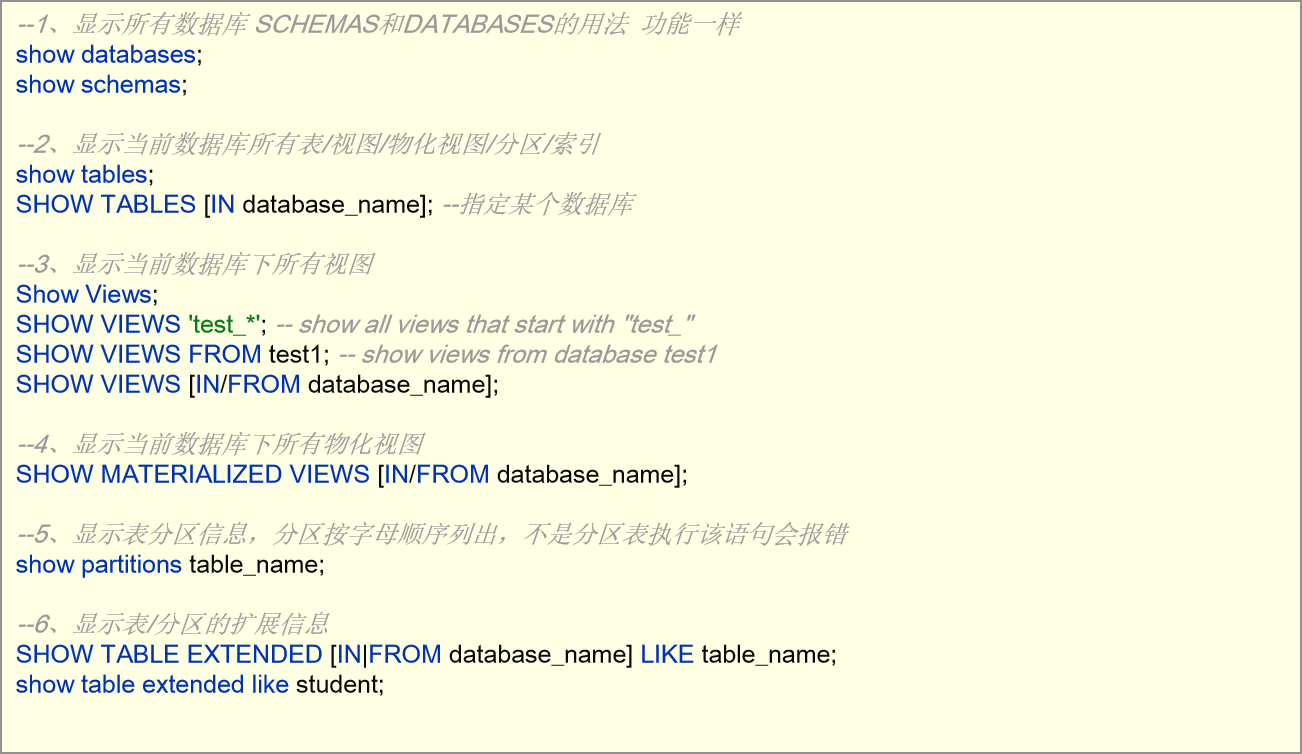

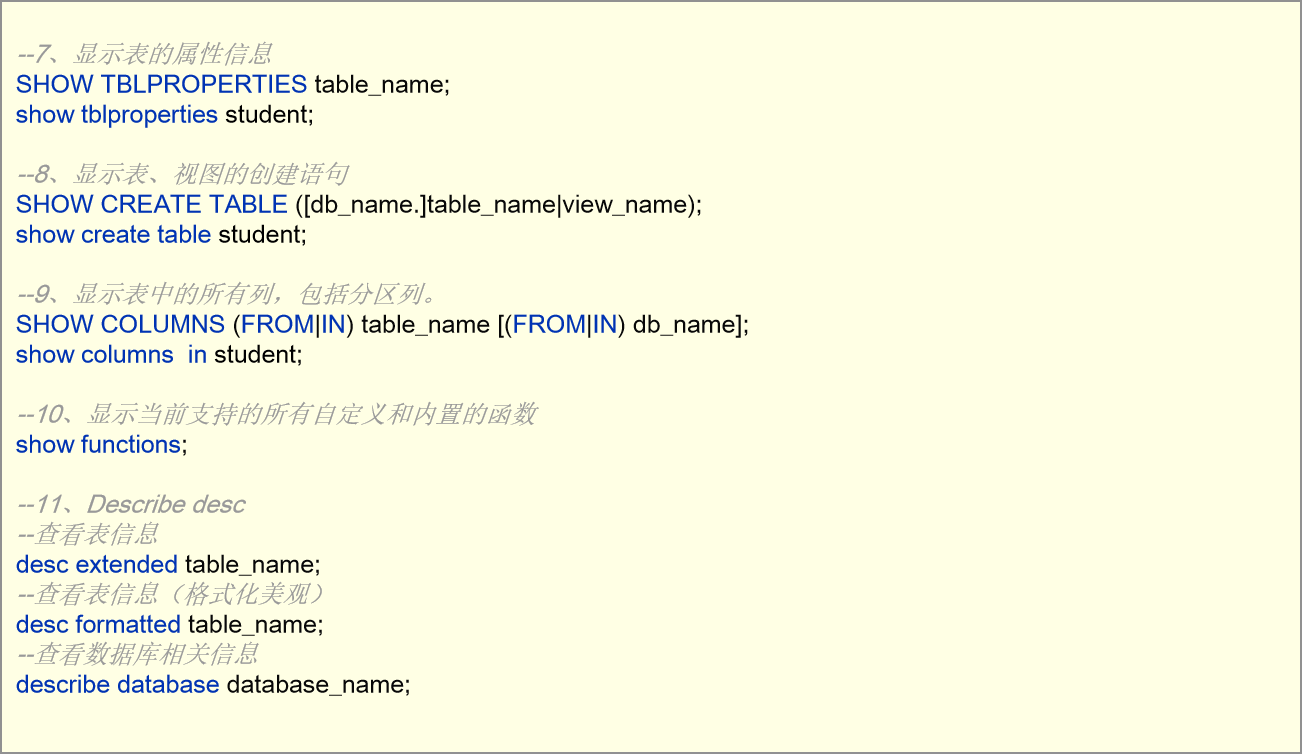